# Random Vertex Generator

In [3]:
from analysis_simulation import Analysis_simulation, magnitude
import uproot
import numpy as np
from numpy import array, where, shape, reshape, pi

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sn

import pandas as pd

In [4]:
file = uproot.open("/snoplus simulations/electron bulk/center point/simu_Analysis_elec_z_10MeV.root")

In [5]:
#IDs = [1,3,5,7,10]
# df = Analysis_simulation(file, [0, 2, 3, 4, 6])
df = Analysis_simulation(file, [0,1,2,3,4])
df.head()

,eventID,hitpmt ID,hit type,time residual,mc coordinates,mc radius,reconst radius,reconst error,hitpmt ID hit 1,hitpmt ID hit 2,time residual hit 1,time residual hit 2,xyz hit 1,spherical hit 1,xyz hit 2,spherical hit 2
0,0,"[8977, 8612, 345, 130, 2611, 9304, 7699, 9406,...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-10262.855285398655, -103.41211156190079, 3.8...","[0.0, 0.0, 0.0]",0.0,185.545119,185.545119,"[345, 130, 2611, 9304, 7699, 9406, 6731, 286, ...","[5174, 1098, 7356, 1129, 5239, 3393, 1554, 782...","[3.869806997546192, 2.270226627645343, 5.56628...","[2.4794606286397993, 4.829957529245803, 3.2249...","[[[6668.18, 1782.97, -4799.28], [7049.55, 1754...","[[[2.1783626255075417, 0.2612727316361346, 840...","[[[5272.759999999999, 922.26, -6502.7599999999...","[[[2.4528887196313756, 0.17315862440897745, 84..."
1,1,"[6721, 2131, 2080, 5225, 4665, 7675, 7217, 725...","[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-30.126944325510124, 3.7975919505109914, 3.79...","[0.0, 0.0, 0.0]",0.0,187.579290,187.579290,"[2131, 2080, 5225, 4665, 7675, 7217, 7259, 362...","[6721, 134, 7674, 4506, 7201, 5539, 7051, 7017...","[3.7975919505109914, 3.798980899703224, 9.7930...","[-30.126944325510124, 24.29853259328894, 2.409...","[[[6463.79, 1944.9199999999998, -5008.5], [757...","[[[2.209153569576132, 0.29227739621220405, 840...","[[[5615.16, 266.8, -6251.09], [5910.5, 673.229...","[[[2.409174192144538, 0.04747852161922757, 840..."
2,2,"[2124, 4725, 8343, 4831, 8080, 559, 1072, 7764...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[13.159421608678315, 2.531283321579764, 19.853...","[0.0, 0.0, 0.0]",0.0,129.920578,129.920578,"[2124, 4725, 8343, 4831, 8080, 559, 1072, 7764...","[1937, 8265, 4771, 1616, 5995, 9418, 1592, 211...","[13.159421608678315, 2.531283321579764, 19.853...","[2.177199566410337, 1.5682771433617404, 3.0151...","[[[8179.28, 1654.9299999999998, 1018.400000000...","[[[1.4493599942093995, 0.19963684914228993, 84...","[[[5615.16, 266.8, -6251.09], [5762.7300000000...","[[[2.409174192144538, 0.04747852161922757, 840..."
3,3,"[314, 5809, 3348, 3765, 4638, 6207, 2908, 5616...","[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.8496730137599968, 5.220689772135614, 2.0454...","[0.0, 0.0, 0.0]",0.0,231.633386,231.633386,"[5809, 3348, 3765, 4638, 6207, 2908, 5616, 928...","[314, 6002, 2056, 2592, 8291, 2832, 4178, 2619...","[5.220689772135614, 2.045420372057208, 3.18573...","[0.8496730137599968, 2.2756390845492263, 4.121...","[[[6568.8, 2134.37, -4807.94], [7388.03, 2866....","[[[2.1789075611188267, 0.3141644289285388, 841...","[[[5467.54, 63.440000000000005, -6406.26999999...","[[[2.435056023684957, 0.01160250373120548, 842..."
4,4,"[8173, 4172, 5496, 7703, 3135, 2, 5489, 1163, ...","[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-93.43472440002114, 1.0648843778353125, 1.182...","[0.0, 0.0, 0.0]",0.0,258.310677,258.310677,"[4172, 5496, 7703, 3135, 2, 5489, 1163, 3725, ...","[8173, 9379, 5726, 6976, 4455, 5720, 6342, 223...","[1.0648843778353125, 1.1827966532061396, 2.629...","[-93.43472440002114, 24.229577339077196, 3.387...","[[[5615.16, 266.8, -6251.09], [7085.14, 2457.3...","[[[2.409174192144538, 0.04747852161922757, 840...","[[[5467.54, 63.440000000000005, -6406.26999999...","[[[2.435056023684957, 0.01160250373120548, 842..."


In [4]:
df['eventID'].tolist()

[0, 1, 2, 3, 4]

# 1 - Plots for a event ID

In [5]:
evt_id_n = df.loc[df['eventID'] == 3]
evt_id_n

,eventID,hitpmt ID,hit type,time residual,mc coordinates,mc radius,reconst radius,reconst error,hitpmt ID hit 1,hitpmt ID hit 2,time residual hit 1,time residual hit 2,xyz hit 1,spherical hit 1,xyz hit 2,spherical hit 2
3,3,"[314, 5809, 3348, 3765, 4638, 6207, 2908, 5616...","[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.8496730137599968, 5.220689772135614, 2.0454...","[0.0, 0.0, 0.0]",0.0,231.633386,231.633386,"[5809, 3348, 3765, 4638, 6207, 2908, 5616, 928...","[314, 6002, 2056, 2592, 8291, 2832, 4178, 2619...","[5.220689772135614, 2.045420372057208, 3.18573...","[0.8496730137599968, 2.2756390845492263, 4.121...","[[[6568.8, 2134.37, -4807.94], [7388.03, 2866....","[[[2.1789075611188267, 0.3141644289285388, 841...","[[[5467.54, 63.440000000000005, -6406.26999999...","[[[2.435056023684957, 0.01160250373120548, 842..."


## 1.2 - Plot time Residuals

### 1.2.1 - Full time residual

In [6]:
time_residual = np.array(evt_id_n['time residual'])[0]
time_residual

array([  0.84967301,   5.22068977,   2.04542037, ..., 291.9067162 ,
       285.64295407, 281.66111309])

Text(0.5, 1.0, 'Time Residual - evtID = 3 - 10MeV')

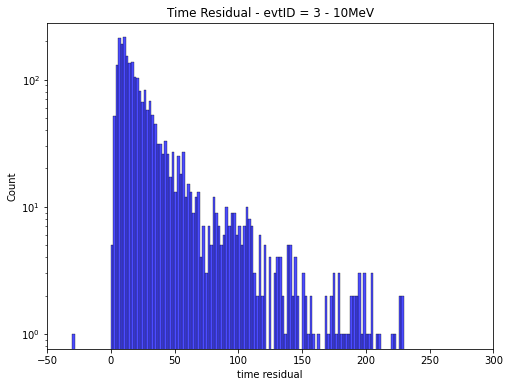

In [11]:
bins = 2

x_title = 'time residual'
title = 'Time Residual - evtID = 3 - 10MeV'

plt.figure(figsize=(8,6))
sn.histplot(time_residual, binwidth = bins, color = 'blue',edgecolor = 'black', alpha = 0.7)

plt.xlim(-50, 300)
plt.yscale('log')


plt.xlabel(x_title)
plt.title(title)

### 1.2.2 Separated time residuals for each hit type

In [7]:
time_residual_hit1 = (evt_id_n['time residual hit 1']).to_numpy()[0].tolist()
time_residual_hit2 = (evt_id_n['time residual hit 2']).to_numpy()[0].tolist()

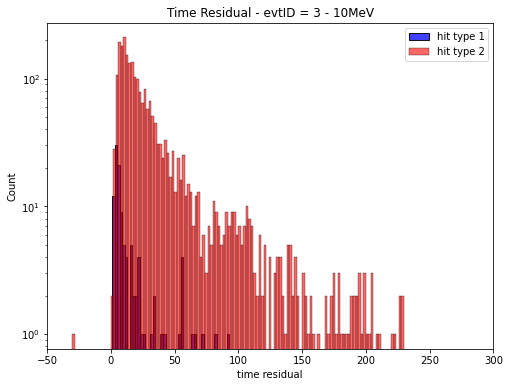

In [13]:
bins1 = 2
bins2 = 2

x_title = 'time residual'
title = 'Time Residual - evtID = 3 - 10MeV'

plt.figure(figsize=(8,6))
sn.histplot(time_residual_hit1, binwidth = bins1, color = 'blue', label = 'hit type 1')
sn.histplot(time_residual_hit2, binwidth = bins2, color = 'red', alpha = 0.6, label = 'hit type 2')

plt.xlim(-50, 300)  #evtID = 3 REALMENTE TIENE UN RESIDUAL A -10 000! Por eso corto la ventana para jugar con el gráfico
plt.yscale('log')

plt.xlabel(x_title)
plt.title(title)
plt.legend()

## 1.3 - Hit distribution plots

### 1.3.1 - 3D plots

In [8]:
#Vertex coordinates

vertex_coord = evt_id_n['mc coordinates'].tolist()[0]
x_vertex = vertex_coord[0]
y_vertex = vertex_coord[1]
z_vertex = vertex_coord[2]

# Separar coordenadas de hits

#CARTESIAN ---------------------------------------
xyz_hit_1 = evt_id_n['xyz hit 1'].tolist()[0][0]
xyz_hit_2 = evt_id_n['xyz hit 2'].tolist()[0][0]

x_hit_1 = xyz_hit_1[:, 0]
y_hit_1 = xyz_hit_1[:, 1]
z_hit_1 = xyz_hit_1[:, 2]

x_hit_2 = xyz_hit_2[:, 0]
y_hit_2 = xyz_hit_2[:, 1]
z_hit_2 = xyz_hit_2[:, 2]

#SPHERICAL ------------------------------------------
sph_hit_1 = evt_id_n['spherical hit 1'].tolist()[0][0]
sph_hit_2 = evt_id_n['spherical hit 2'].tolist()[0][0]

zenit_hit_1 = sph_hit_1[:,0]
azimut_hit_1 = sph_hit_1[:,1]
rad_hit_1 = sph_hit_1[:,2]

zenit_hit_2 = sph_hit_2[:,0]
azimut_hit_2 = sph_hit_2[:,1]
rad_hit_2 = sph_hit_2[:,2]
azimut_hit_2

array([ 0.0116025 ,  0.04747852,  0.08136293, ..., -0.46281725,
       -0.44533072, -0.68506656])

In [9]:
%matplotlib
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(x_hit_1, y_hit_1, z_hit_1, c = 'blue', s = 15, label = 'CEV')
#ax.scatter(x_hit_2, y_hit_2, z_hit_2, c = 'r', s = 5, label = 'SCINT')
ax.scatter(x_vertex, y_vertex, z_vertex, c = 'g', s = 10, label = 'VERTEX')
plt.legend()

ax.axes.set_xlim3d(left=-9000, right=9000) 
ax.axes.set_ylim3d(bottom=-9000, top=9000) 
ax.axes.set_zlim3d(bottom=-9000, top=9000) 

plt.show()

Using matplotlib backend: Qt5Agg


### 1.3.2 - xy plane plot 
just because electron simulation is along -z

In [59]:
title = 'xy plane - hit type 1 - evtID = 3 - 10MeV'

plt.figure(figsize=(8,8))
sn.set_style(rc = {'axes.facecolor': 'black'})
sn.histplot(x = x_hit_1, y = y_hit_1, bins = [30,30], stat='count', cbar = 'True', cmap = cm.nipy_spectral)
plt.ylabel('y_pmt')
plt.xlabel('x_pmt')
plt.title(title)

#equal acis ration
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

### 1.3.3 Plots in angular variables for hit type = 1

In [76]:
bins = 30
title = '$\phi(\Theta$) angular distribution - hit type 1 - 10MeV'
x_title = 'zenith'
y_title = 'azimuth'

sn.set_style(rc = {'axes.facecolor': 'black'})
sn.histplot(x = zenit_hit_1, y = azimut_hit_1, bins = [bins,bins] , stat='count', cbar = 'True', cmap = cm.nipy_spectral)

plt.xlabel(x_title)
plt.ylabel(y_title)
plt.title(title)
#equal acis ration
# ax = plt.gca()
# ax.set_aspect('equal', adjustable='box')
plt.show()

In [79]:
bins = 30
title = '$\phi(cos(\Theta)$ angular distribution - hit type 1 - 10MeV'
x_title = 'cos(zenith)'
y_title = 'azimuth'

sn.set_style(rc = {'axes.facecolor': 'black'})
sn.histplot(x = np.cos(zenit_hit_1), y = azimut_hit_1, bins = [bins,bins] , stat='count', cbar = 'True', cmap = cm.nipy_spectral)

plt.xlabel(x_title)
plt.ylabel(y_title)

plt.show()

In [39]:
len(np.cos(zenit_hit_1))

111

In [40]:
len(zenit_hit_1)

111

## 1.4 - Time Residual cuts

In [41]:
hitpmt_ID_hit_1 = (evt_id_n['hitpmt ID hit 1']).tolist()[0]

# Data to be cuted and taken:

time_res_hit_1_cut = np.array([])                     # time residual
hitpmt_ID_hit_1_cut = np.array([], dtype = np.int64)  # ID´s after cut
xyz_hit_1_cut = np.array([])                                    # cartesian coordinates
sph_hit_1_cut = np.array([])                                    # spherical coordinates

#cuts
up_cut = 10
inf_cut = -50

for i in np.where((np.array(time_residual_hit1) > inf_cut) & (np.array(time_residual_hit1) < up_cut))[0]:

    time_res_hit_1_cut = np.append(time_res_hit_1_cut, time_residual_hit1[i])
    hitpmt_ID_hit_1_cut = np.append(hitpmt_ID_hit_1_cut, hitpmt_ID_hit_1[i])
    xyz_hit_1_cut = np.append(xyz_hit_1_cut, xyz_hit_1[i]).reshape((-1,3))
    sph_hit_1_cut = np.append(sph_hit_1_cut, sph_hit_1[i]).reshape((-1,3))

### 1.4.1 - Plots after cut

In [42]:
#CARTESIAN ---------------------------------------
x_hit_1_cut = xyz_hit_1_cut[:, 0]
y_hit_1_cut = xyz_hit_1_cut[:, 1]
z_hit_1_cut = xyz_hit_1_cut[:, 2]

#SPHERICAL ------------------------------------------
zenit_hit_1_cut = sph_hit_1_cut[:,0]
azimut_hit_1_cut = sph_hit_1_cut[:,1]
rad_hit_1_cut = sph_hit_1_cut[:,2]

#### 1.4.1.1 xy plane plot (cut)

In [43]:
title = 'xy plane - hit type 1 - evtID = 3 - 10MeV - cut'

plt.figure(figsize=(8,8))
plt.hist2d(x = x_hit_1_cut, y = y_hit_1_cut, bins = [30,30], density = True, cmap = cm.nipy_spectral)
plt.ylabel('y_pmt')
plt.xlabel('x_pmt')
plt.title(title)

#equal acis ration
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

### 1.3.3 Plots in angular variables for hit type = 1 (cut)

In [9]:
%matplotlib

bins = 30
title = '$\phi(\Theta$) angular distribution - hit type 1 - 10MeV - cut'
x_title = 'zenith'
y_title = 'azimuth'

plt.figure(figsize=(8,8))
plt.hist2d(x = zenit_hit_1_cut, y = azimut_hit_1_cut, bins = [bins,bins], density = True, cmap = cm.nipy_spectral)
plt.xlabel(x_title)
plt.ylabel(y_title)
plt.title(title)

#equal acis ration
#ax = plt.gca()
#ax.set_aspect('equal', adjustable='box')
plt.show()
matplotlib.use('Agg')

Using matplotlib backend: Qt5Agg


NameError: name 'zenit_hit_1_cut' is not defined

In [45]:
bins = 30
title = '$\phi(cos(\Theta)$ angular distribution - hit type 1 - 10MeV - cut'
x_title = 'cos(zenith)'
y_title = 'azimuth'

plt.figure(figsize=(8,8))
plt.hist2d(x = np.cos(zenit_hit_1_cut), y = azimut_hit_1_cut, bins = [bins,bins], density = True)
plt.xlabel(x_title)
plt.ylabel(y_title)

plt.show()

## 2 - Build functions to obtain plots

In [4]:
from Chev_vs_Scint_plots import time_res_hist, xy_plane_hits, angular_dist

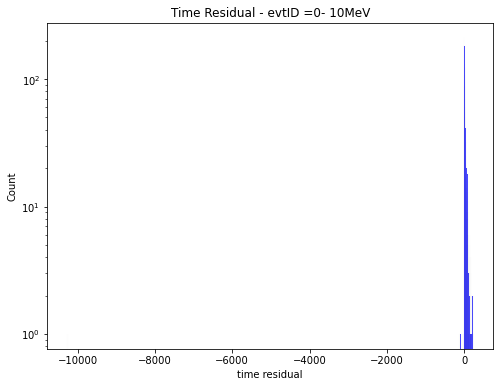

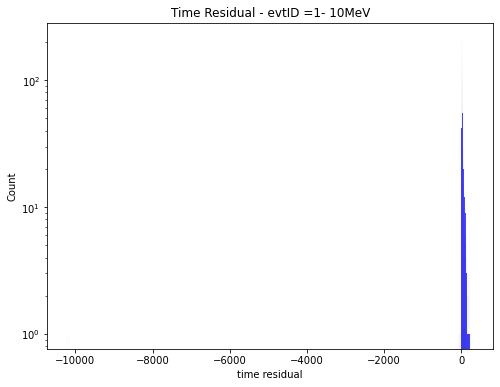

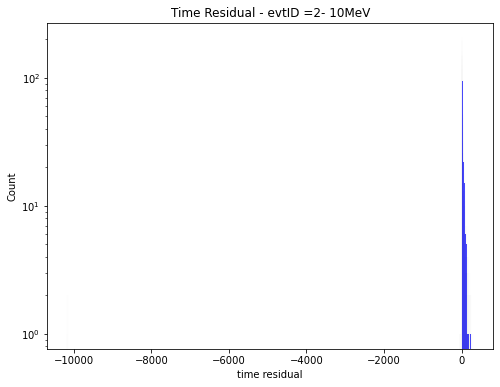

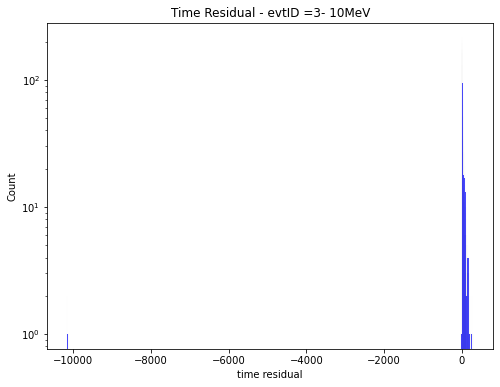

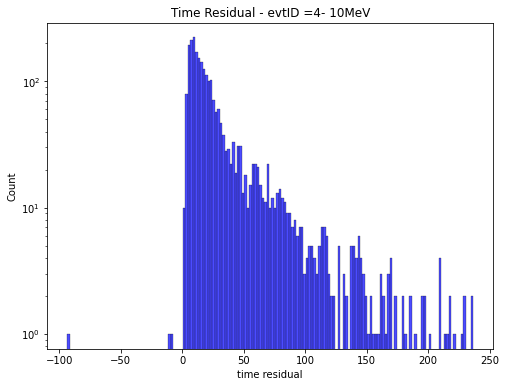

In [5]:
time_res_hist(df)

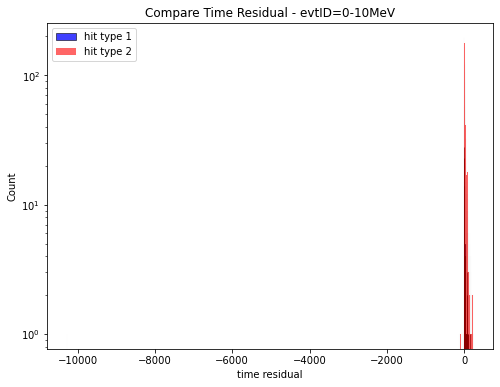

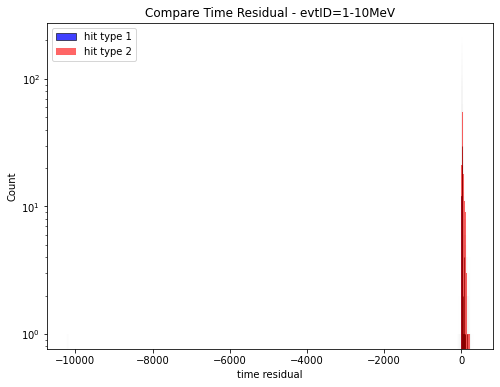

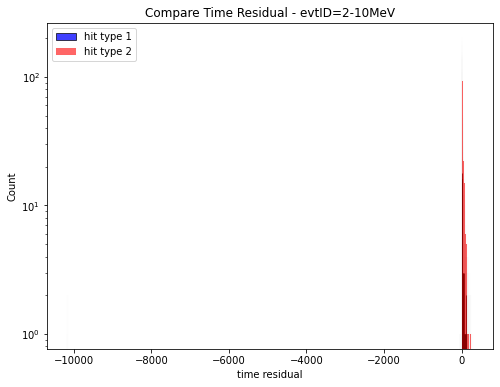

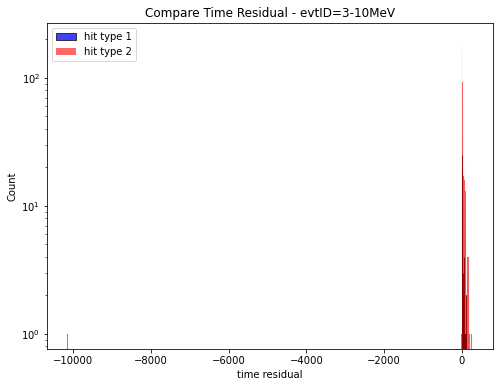

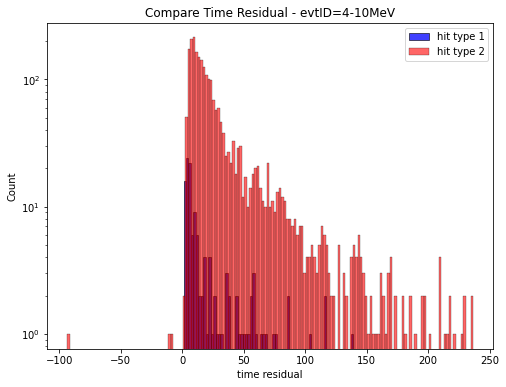

In [6]:
time_res_hist(df, split = True)

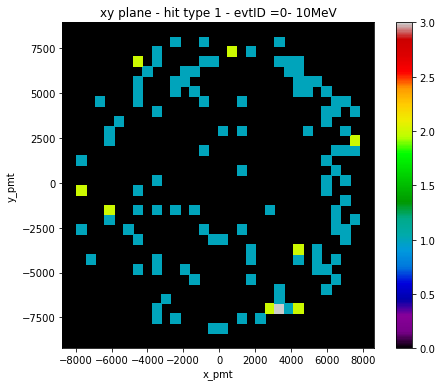

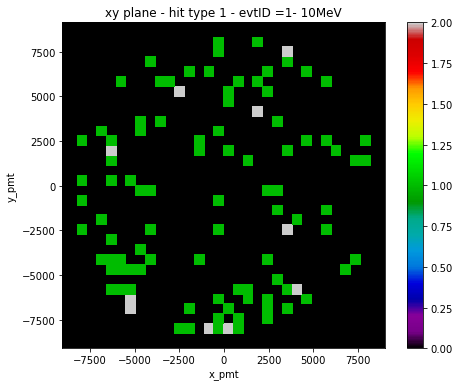

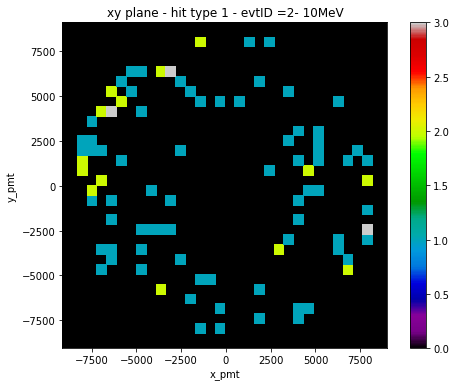

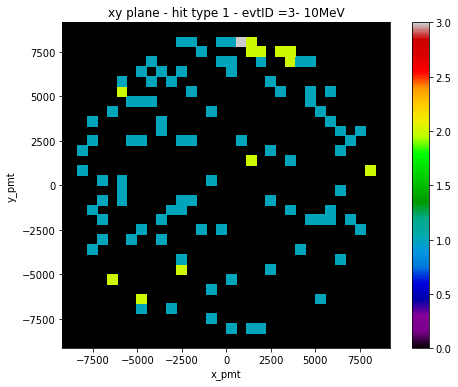

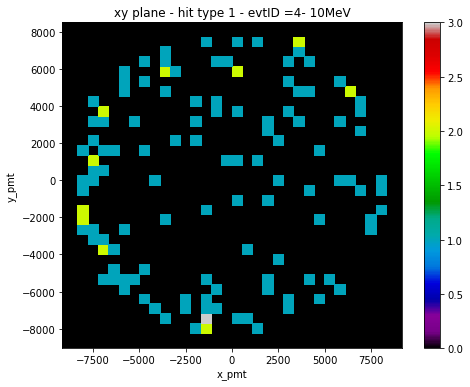

In [5]:
#xy_plane_hits(df, bins = None, cut = False, inf_cut = None, up_cut = None)
xy_plane_hits(df)

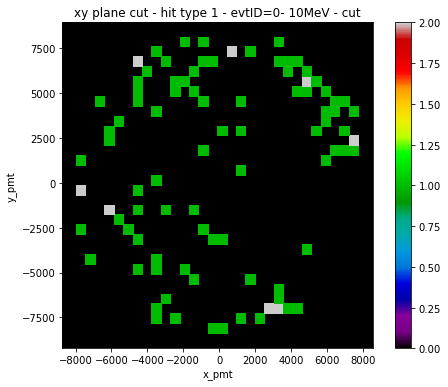

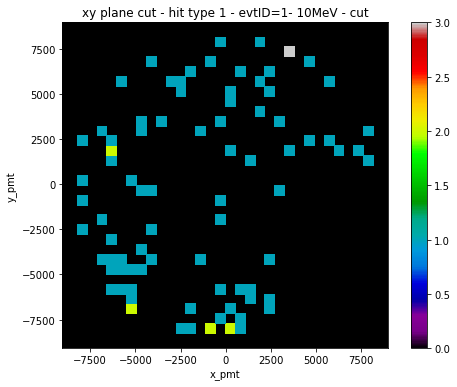

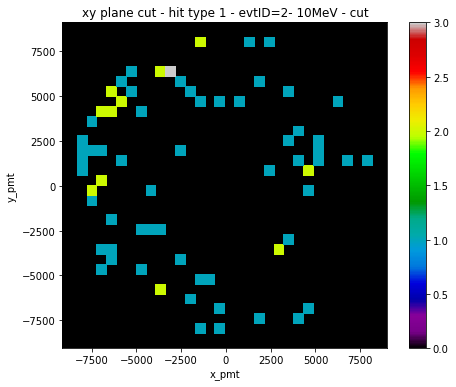

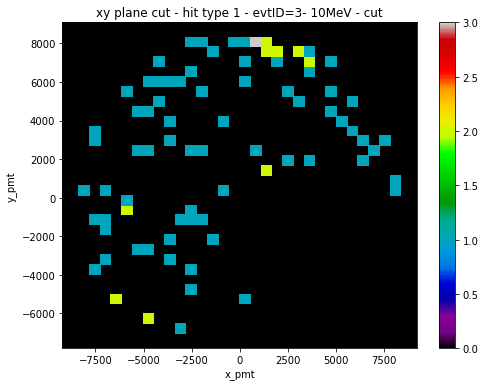

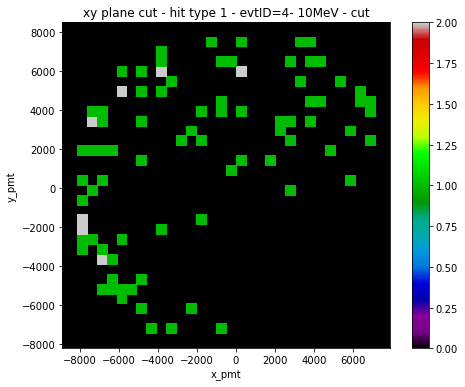

In [5]:
xy_plane_hits(df, cut = True, inf_cut = -50, up_cut = 20)

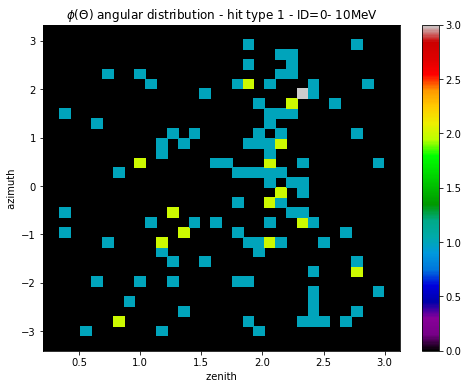

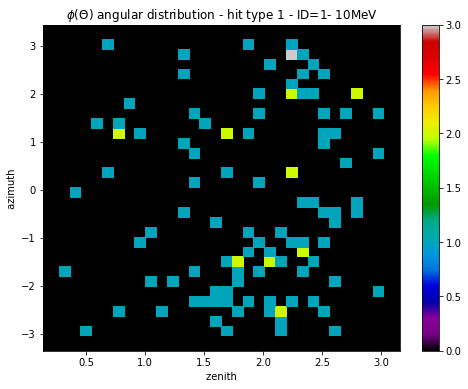

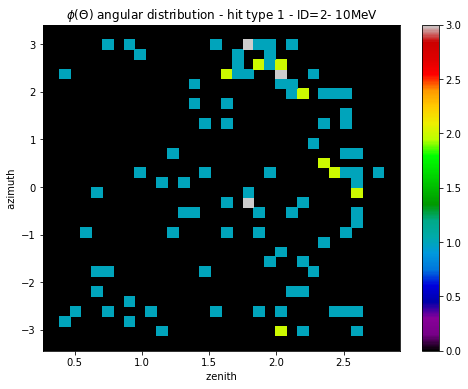

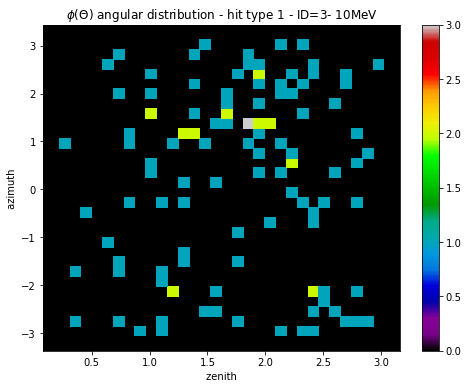

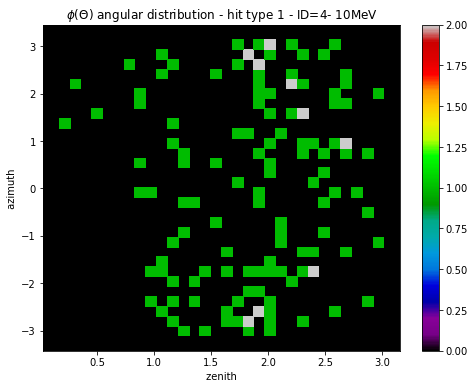

In [6]:
#angular_dist(df, bins = None, coseno = False, cut = False, inf_cut = None, up_cut = None)
angular_dist(df)

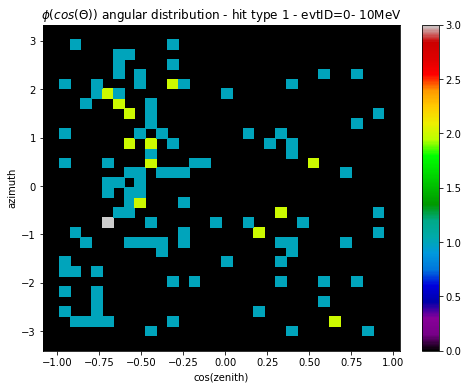

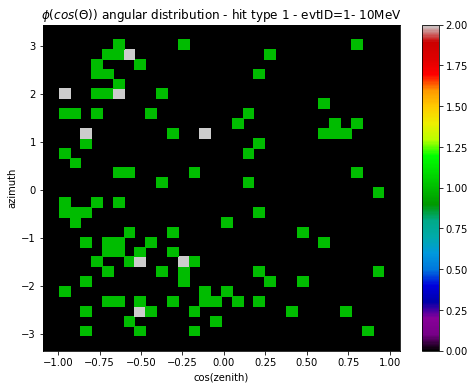

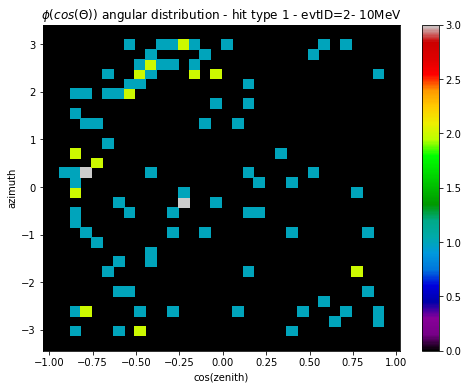

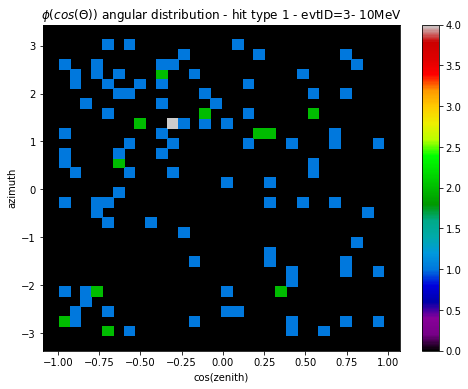

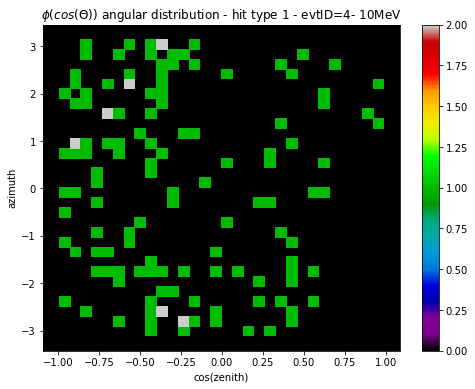

In [7]:
angular_dist(df, coseno = True)

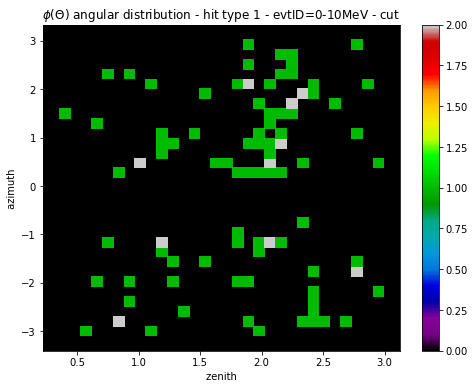

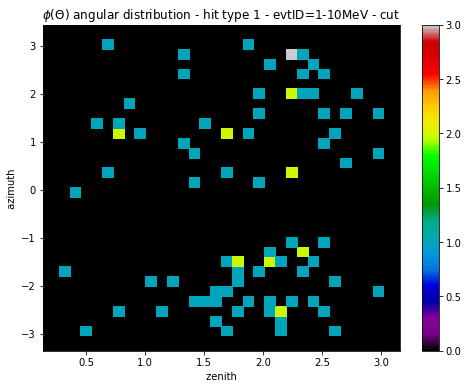

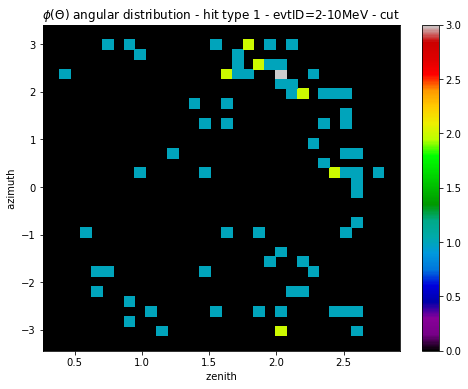

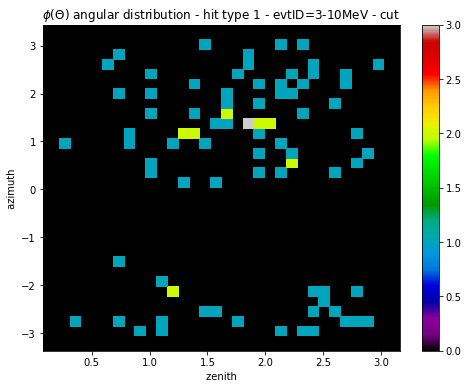

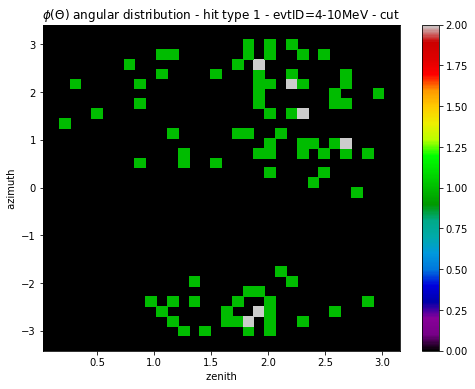

In [8]:
angular_dist(df, cut = True, inf_cut = -50, up_cut = 20)

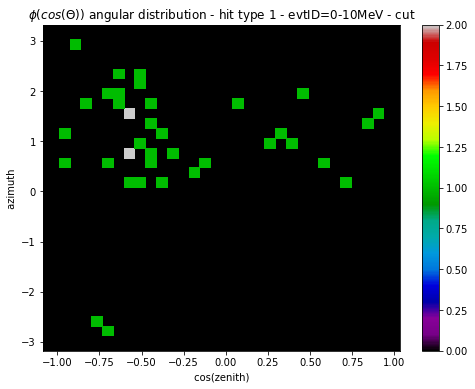

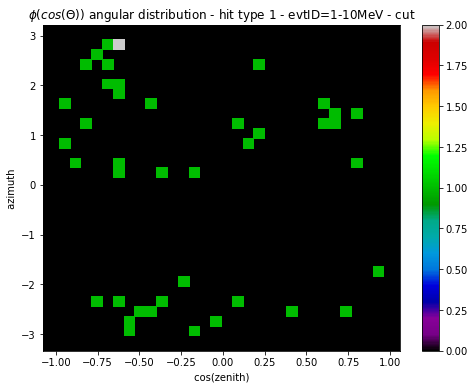

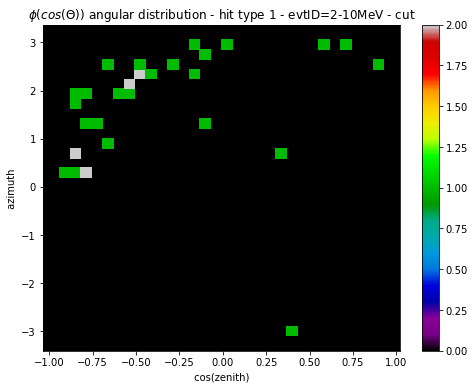

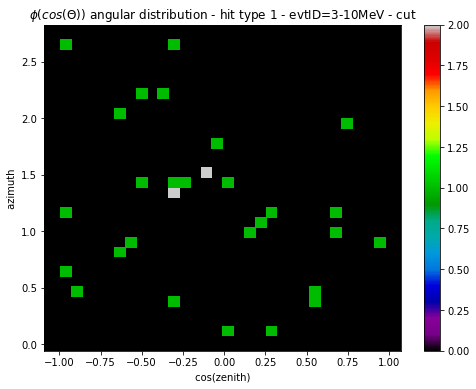

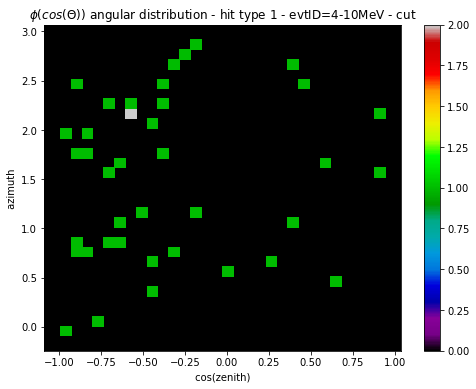

In [9]:
angular_dist(df, coseno = True ,cut = True, inf_cut = -50, up_cut = 5)